# Self Study 1

This self study sheet contains some code, and some questions. You should first walk through the code, and then work on the questions. The questions can be answered by extending this notebook with some additional code and text ("markdown") cells. A brief guide to formatting in markdown cells is here:<br>
https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed<br>
<br>
The questions in this and the following self study sheets are marked with the following tags:
**[Linear]**,**[SVM]**,**[Markov]**. This corresponds to 3 different exam questions for the machine learning part of the exam. Todays questions are labeled [Linear]. Note, though, that also when you draw one of the other questions at the exam, you should still know what a decision region is ...

The following just gives us some tools we'll need

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

In [2]:
def maxpos(A):
    '''
    Takes an n x k array A, and returns 1-dim n array where the i'th
    entry is the index of column in A where the i'th row of A has its
    maximal value (application: turns a probabilitiy distribution over
    k classes for n instances into a single prediction)
    '''
    return np.argmax(A,axis=1)
    

We load the Iris dataset and inspect what it is about. Iris is probably the most heavily used dataset in machine learning. It even has its own Wikipedia page: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [3]:
irisdata = load_iris()

print(irisdata.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The Iris data contains 4 features. In order to facillitate visualization of decision regions,
it is better to use two features only, that then can be plotted in 2D. Here we select
two features, and make a scatter plot of their values:

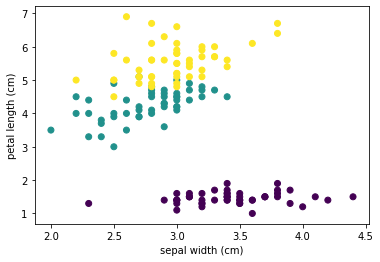

In [23]:
feat1 = 1
feat2 = 2
plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=irisdata.target)
#print(irisdata.data[:,feat1])
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])

plt.show()



Prediction by **K nearest neighbor**. First learn the model (not much learning going on in the case of the KNN classifier). We continue to only use the first two features of the data:

In [18]:
onehotclasses = np.zeros((irisdata.target.size,3))
for i in range(irisdata.target.size): 
    onehotclasses[i][irisdata.target[i]]=1.0

irisknn= KNeighborsClassifier()
irisknn.fit(irisdata.data[:,[feat1,feat2]],onehotclasses)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Prediction by **linear regresssion**:

In [14]:
onehotclasses = np.zeros((irisdata.target.size,3))
for i in range(irisdata.target.size): 
    onehotclasses[i][irisdata.target[i]]=1.0

irislinreg = LinearRegression()
irislinreg.fit(irisdata.data[:,[feat1,feat2]],onehotclasses)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plotting labeled data points and decision regions. First, a meshgrid is constructed consisting of a fine grid of points that we classify, and then use for visualization of the decision regions. Then, our classifier is applied to the grid (uncomment the pair of lines you want for either knn or linear regression).


<Figure size 432x288 with 0 Axes>

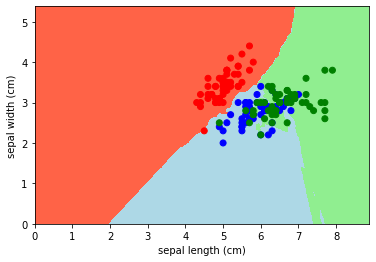

<Figure size 432x288 with 0 Axes>

In [20]:
maxval1 = np.max(irisdata.data[:,feat1])
maxval2 = np.max(irisdata.data[:,feat2])

xx, yy = np.meshgrid(np.arange(0, maxval1+1, 0.02), np.arange(0, maxval2+1, 0.02))

Z = irisknn.predict(np.c_[xx.ravel(), yy.ravel()])
meshclasses = Z

#Z = irislinreg.predict(np.c_[xx.ravel(), yy.ravel()])
#meshclasses = maxpos(Z)

meshclasses = meshclasses.reshape(xx.shape)
plt.contourf(xx,yy,meshclasses,[-0.1,0.1,1,2],colors=('tomato','lightblue','lightgreen'))
plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=irisdata.target, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])
plt.figure()



**Exercise 1 [Linear]** Visualize and describe the decision boundaries obtained from the KNN classifier and the linear regression classifier. Use different values of K in the KNN classifier, and also consider different selections of predictive features (see explanations in the code). This does not require any extension of the code.





# Exercise 1

## KNN

* Values of K used :

### feature 1 and 2
- 1 
- 2
- 3
- 5
- 10

### feature 2 and 3
- 1 
- 2
- 3
- 5
- 10


## Linear Regression

### feature 1 and 2

### feature 2 and 3


**Exercise 2 [Linear]:** Divide the data into 70% training and 30% test data. Learn KNN and linear regression classifiers from the training data, and evaluate their accuracy both on the training and test data. For the KNN classifier,
draw the curves that show train/test accuracy as a function of K. Useful sklearn functions:<br>
`sklearn.model selection.train test split`<br>
`sklearn.metrics.accuracy score`<br>
`sklearn.metrics.confusion matrix`

(105, 2) (105,)
(45, 2) (45,)
[0.8888888888888888, 0.8444444444444444, 0.9333333333333333, 0.9111111111111111, 0.9333333333333333]


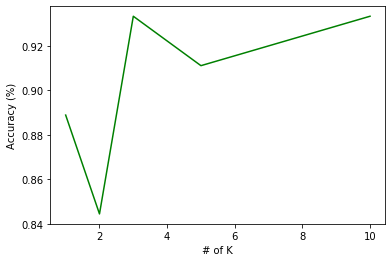

[[13  0  0]
 [ 0 16  2]
 [ 0  1 13]]
Score:  0.9333333333333333


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

x: np.ndarray = irisdata.data[:,[feat1,feat2]]
y: np.ndarray = irisdata.target

trnX, tstX, trnY, tstY = train_test_split(x, y, test_size=0.3,random_state=20)

print(trnX.shape,trnY.shape)
print(tstX.shape,tstY.shape)
knn = [1,2,3,5,10]
accuracy = []
for i in knn:
    classifier = KNeighborsClassifier(n_neighbors = i)
    model = classifier.fit(trnX,trnY)
    predictions = model.predict(tstX)
    accuracy.append(accuracy_score(tstY, predictions))
print(accuracy)

#plt.scatter(tstY, predictions)
#plt.xlabel("True Values")
#plt.ylabel("Predictions")

#TODO######################
plt.plot(knn,accuracy, label="accuracy", color="green")
plt.ylabel("Accuracy (%)")
plt.xlabel("# of K")
################
plt.show()
results = confusion_matrix(tstY, predictions) 
print(results)
print("Score: ", accuracy_score(tstY, predictions))

plt.figure()

#tstY_pred = irisknn.predict(trnX)

#print(f"\nTest Accuracy Score: {accuracy_score(tstY, tstY_pred):.2f}")


**Exercise 3 [Linear]:**  Also perform (some) of the previous experiments using the full set of 4 predictive features. How does that
change the classification performance? Which of the 3 Iris classes is easiest to classify? Why?

(105, 4) (105,)
(45, 4) (45,)
[[13  0  0]
 [ 0 17  1]
 [ 0  3 11]]
Score:  0.9111111111111111


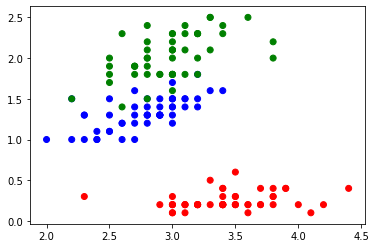

In [63]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

x: np.ndarray = irisdata.data
y: np.ndarray = irisdata.target
    
trnX, tstX, trnY, tstY = train_test_split(x, y, test_size=0.3,random_state=20)

print(trnX.shape,trnY.shape)
print(tstX.shape,tstY.shape)

classifier = KNeighborsClassifier(n_neighbors =1 )
model = classifier.fit(trnX,trnY)
predictions = model.predict(tstX)


results = confusion_matrix(tstY, predictions) 
print(results)
print("Score: ", accuracy_score(tstY, predictions))
plt.scatter(irisdata.data[:,feat1],irisdata.data[:,3],c=irisdata.target, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))




###Class 0 has no error, so probably should be the easiest to classify  ( not sure)